In [1]:
#importing libraries

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

import nltk

In [2]:
%%time
df=pd.read_csv('wiki_movie_plots_deduped_cleaned_genre.csv')

Wall time: 1.31 s


In [3]:
df['Plot']

0        A bartender is working at a saloon, serving dr...
1        The moon, painted with a smiling face hangs ov...
2        The film, just over a minute long, is composed...
3        Lasting just 61 seconds and consisting of two ...
4        The earliest known adaptation of the classic f...
                               ...                        
41505    The film begins in 1919, just after World War ...
41506    Two musicians, Salih and Gürkan, described the...
41507    Zafer, a sailor living with his mother Döndü i...
41508    The film centres around a young woman named Am...
41509    The writer Orhan Şahin returns to İstanbul aft...
Name: Plot, Length: 41510, dtype: object

In [4]:
df['Plot'][3233]

"Tim Kerry (Harry Carey), a veteran cop in the district of Hell's Kitchen, welcomes his son Ritzy (Bruce Cabot) after spending two years in prison. Ritzy has good friends and his former wife Julia (Julie Bishop) is hopeful that it will go on the right track. But the head of the gang, Morelli (Wynne Gibson) knows that Ritzy has good talent for crime, and makes a great offer, very hard to refuse."

### List of punctuations

In [5]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Functions for cleaning the data

In [6]:
def remove_punctuation(text):
    return ''.join([words.lower() for words in text if words not in string.punctuation])


def tokenization(text):
    return nltk.tokenize.word_tokenize(text)


stopwords = nltk.corpus.stopwords.words('english')
def stopwards(words):
    return [i for i in words if i not in stopwords]

lemma= nltk.WordNetLemmatizer()

def lemmatization(words):
    return ' '.join([lemma.lemmatize(word) for word in words])




### Cleaning the PLOT's

In [7]:

# \r and \n
df['Plot_1'] = df['Plot'].str.replace("\r", " ")
df['Plot_1'] = df['Plot_1'].str.replace("\n", " ")
df['Plot_1'] = df['Plot_1'].str.replace("    ", " ")

In [8]:
#%%time
#df['Plot_1']=df['Plot_1'].apply(lambda x: re.sub(r'[0-9]', ' ',x))

### Removing the Punctations and Numbers

In [9]:
%%time
df['plot_without_punct']=df['Plot_1'].apply(lambda x: re.sub(r'[0-9]', '',x)).apply(lambda x: remove_punctuation(x))

Wall time: 13.8 s


### Tokenizing the words

In [10]:
%%time
df['plot_tokenized']=df['plot_without_punct'].apply(lambda x: tokenization(x))

Wall time: 45.1 s


### Removing the Stopwords

In [11]:
%%time 
df['plot_tokenized_removed_sw']=df['plot_tokenized'].apply(lambda x: stopwards(x))

Wall time: 22.6 s


### Lemmatization

In [12]:
%%time 
df['plot_lemma']=df['plot_tokenized_removed_sw'].apply(lambda x: lemmatization(x))

Wall time: 31.3 s


In [13]:
df

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,Genre_updated,Plot_1,plot_without_punct,plot_tokenized,plot_tokenized_removed_sw,plot_lemma
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,NaN,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",NaN,"A bartender is working at a saloon, serving dr...",a bartender is working at a saloon serving dri...,"[a, bartender, is, working, at, a, saloon, ser...","[bartender, working, saloon, serving, drinks, ...",bartender working saloon serving drink custome...
1,1901,Love by the Light of the Moon,American,Unknown,NaN,NaN,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",NaN,"The moon, painted with a smiling face hangs ov...",the moon painted with a smiling face hangs ove...,"[the, moon, painted, with, a, smiling, face, h...","[moon, painted, smiling, face, hangs, park, ni...",moon painted smiling face hang park night youn...
2,1901,The Martyred Presidents,American,Unknown,NaN,NaN,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",NaN,"The film, just over a minute long, is composed...",the film just over a minute long is composed o...,"[the, film, just, over, a, minute, long, is, c...","[film, minute, long, composed, two, shots, fir...",film minute long composed two shot first girl ...
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,NaN,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,NaN,Lasting just 61 seconds and consisting of two ...,lasting just seconds and consisting of two sh...,"[lasting, just, seconds, and, consisting, of, ...","[lasting, seconds, consisting, two, shots, fir...",lasting second consisting two shot first shot ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,NaN,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,NaN,The earliest known adaptation of the classic f...,the earliest known adaptation of the classic f...,"[the, earliest, known, adaptation, of, the, cl...","[earliest, known, adaptation, classic, fairyta...",earliest known adaptation classic fairytale fi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41505,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,NaN,https://en.wikipedia.org/wiki/The_Water_Diviner,"The film begins in 1919, just after World War ...",NaN,"The film begins in 1919, just after World War ...",the film begins in just after world war i has...,"[the, film, begins, in, just, after, world, wa...","[film, begins, world, war, ended, centres, aro...",film begin world war ended centre around joshu...
41506,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the...",comedy,"Two musicians, Salih and Gürkan, described the...",two musicians salih and gürkan described the a...,"[two, musicians, salih, and, gürkan, described...","[two, musicians, salih, gürkan, described, adv...",two musician salih gürkan described adventure ...
41507,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i...",comedy,"Zafer, a sailor living with his mother Döndü i...",zafer a sailor living with his mother döndü in...,"[zafer, a, sailor, living, with, his, mother, ...","[zafer, sailor, living, mother, döndü, coastal...",zafer sailor living mother döndü coastal villa...
41508,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...,comedy,The film centres around a young woman named Am

### Selecting the dersired columns

In [14]:
df.columns

Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot', 'Genre_updated', 'Plot_1',
       'plot_without_punct', 'plot_tokenized', 'plot_tokenized_removed_sw',
       'plot_lemma'],
      dtype='object')

In [15]:
df=df[['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre','Genre_updated', 'Wiki Page', 'Plot', 'plot_lemma']]

In [16]:
df.rename(columns={'plot_lemma': 'Plot_cleanned'},inplace=True)

In [17]:
df

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Genre_updated,Wiki Page,Plot,Plot_cleanned
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",bartender working saloon serving drink custome...
1,1901,Love by the Light of the Moon,American,Unknown,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",moon painted smiling face hang park night youn...
2,1901,The Martyred Presidents,American,Unknown,NaN,NaN,NaN,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",film minute long composed two shot first girl ...
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,NaN,NaN,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,lasting second consisting two shot first shot ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,NaN,NaN,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,earliest known adaptation classic fairytale fi...
...,...,...,...,...,...,...,...,...,...,...
41505,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,NaN,NaN,https://en.wikipedia.org/wiki/The_Water_Diviner,"The film begins in 1919, just after World War ...",film begin world war ended centre around joshu...
41506,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the...",two musician salih gürkan described adventure ...
41507,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i...",zafer sailor living mother döndü coastal villa...
41508,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...,film centre around young woman named amy tyler...


In [18]:
df.to_csv('wiki_movie_plots_deduped_cleaned_genre_and_plot.csv',index=False)

In [19]:
data=df[['Plot','Plot_cleanned','Genre_updated']]

In [26]:
data['Len_of_Plot']=data['Plot_cleanned'].apply(lambda x: len(x))

In [30]:
max(data['Len_of_Plot'])

23062

In [ ]:
import matplotlib.pyplot as plt

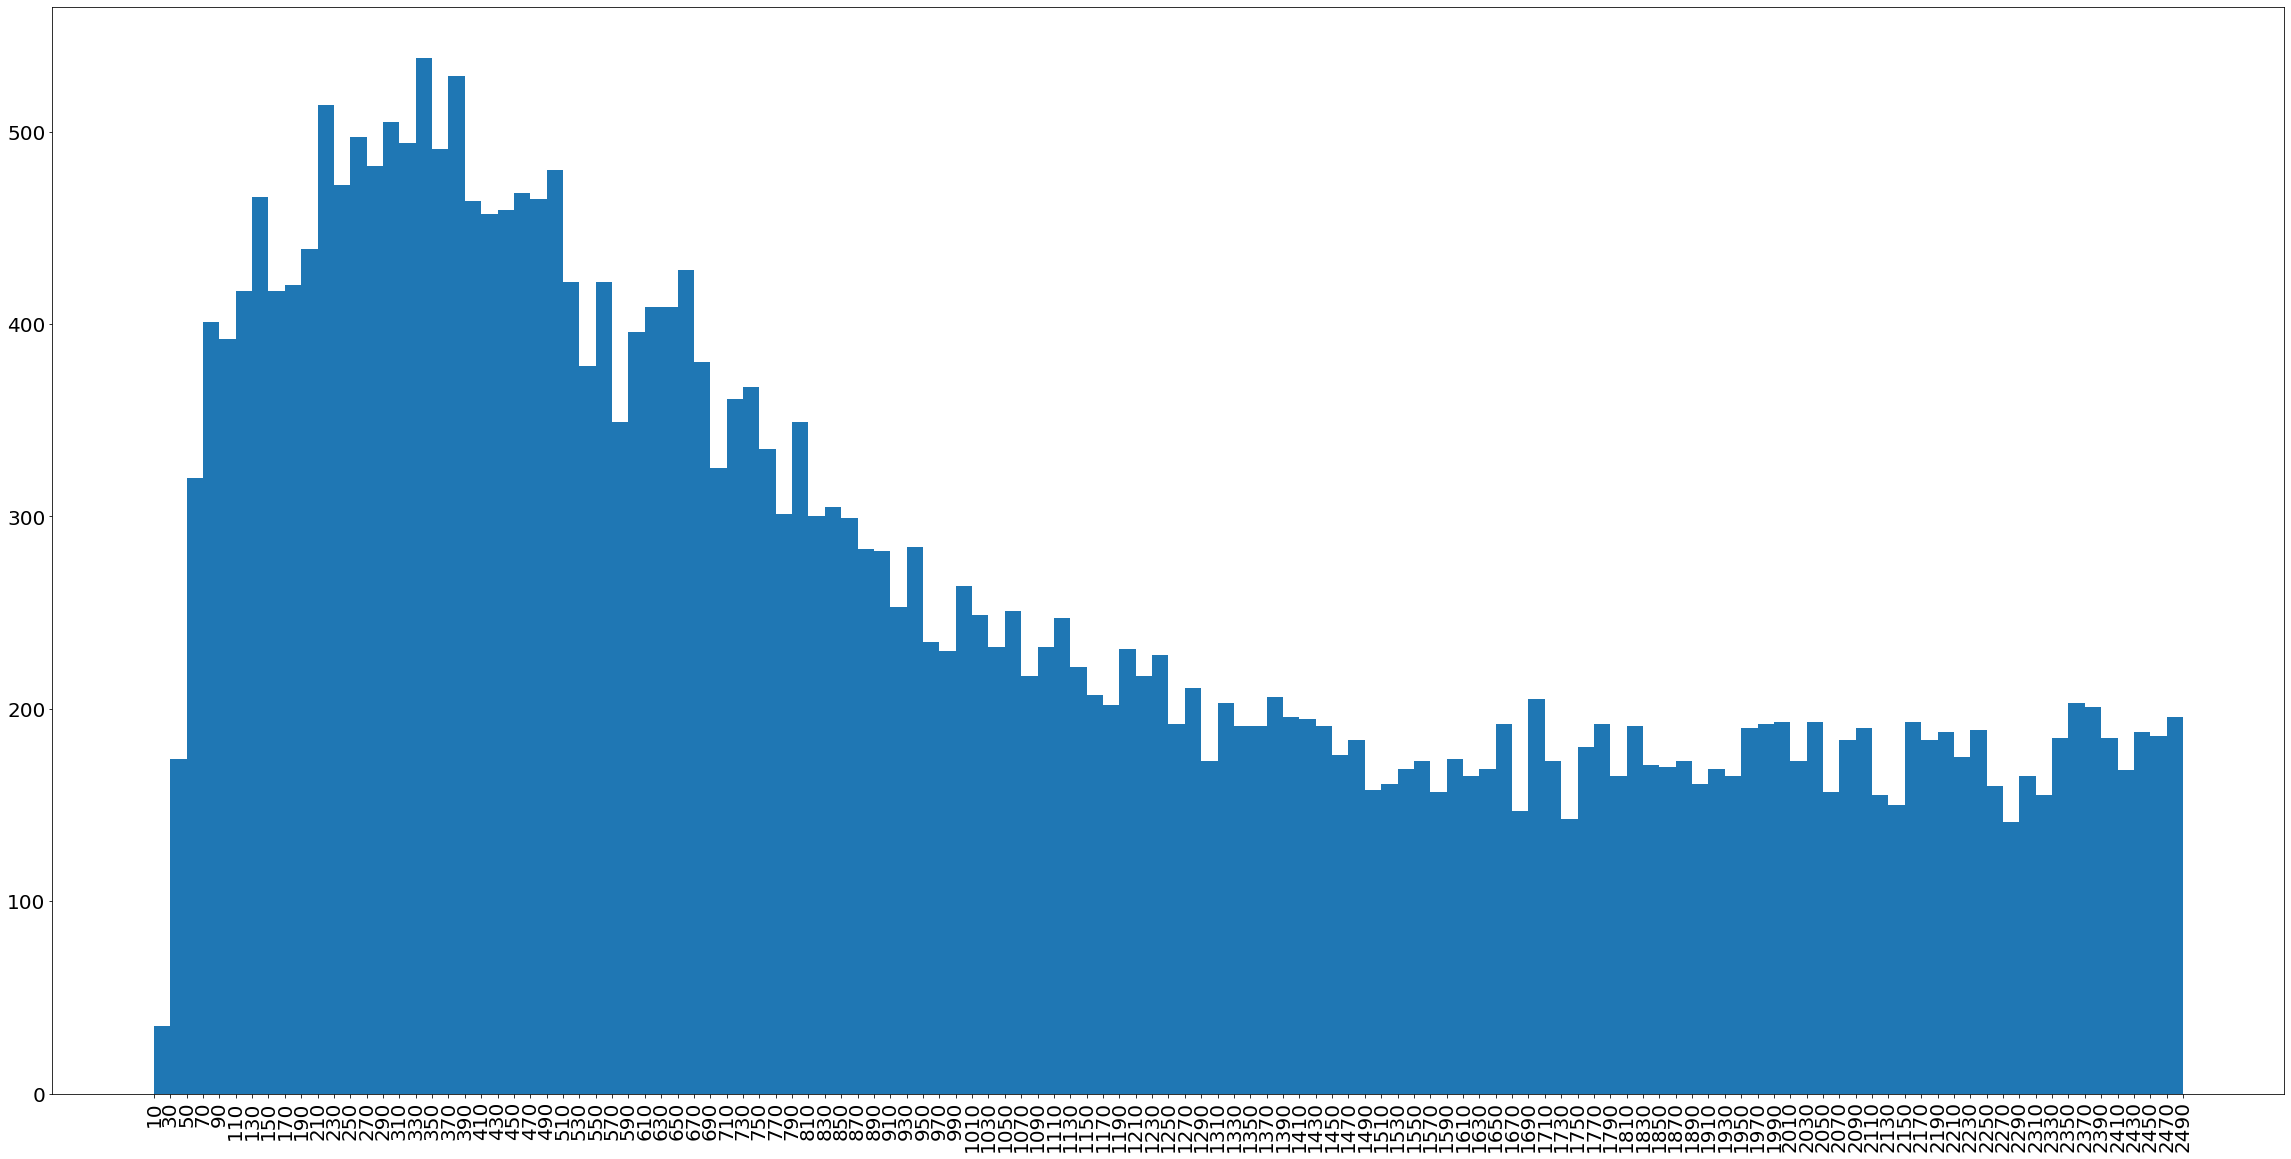

In [46]:
bins= [i for i in range(10,2500,20)]
plt.rcParams["figure.figsize"] = (40,20)
plt.hist(data['Len_of_Plot'], bins=bins)
plt.xticks(bins,size=20,rotation=90)
plt.yticks(size=20)
plt.show() 
